# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview

combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.

len(combined_data['Mouse ID'].unique())

249

In [9]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice_data = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_data = duplicate_mice_data['Mouse ID'].unique()

duplicate_mice_data

array(['g989'], dtype=object)

In [10]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice_data = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

print(duplicate_mice_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [20]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data = combined_data[combined_data['Mouse ID'] != 'g989']
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [21]:
# Checking the number of mice in the clean DataFrame.

len(clean_data['Mouse ID'].unique())

248

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

summary_stats_table = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

summary_stats_table.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']

# Assemble the resulting series into a single summary DataFrame.

summary_stats_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std. Err.'})

# Print

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

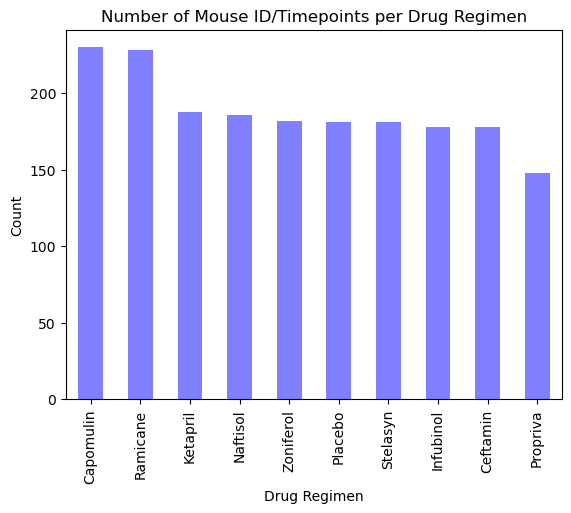

In [26]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_counts = clean_data['Drug Regimen'].value_counts()
drug_counts.plot(kind='bar', color='blue', alpha=0.5)

# labels

plt.title('Number of Mouse ID/Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Count')

# Print

plt.show()



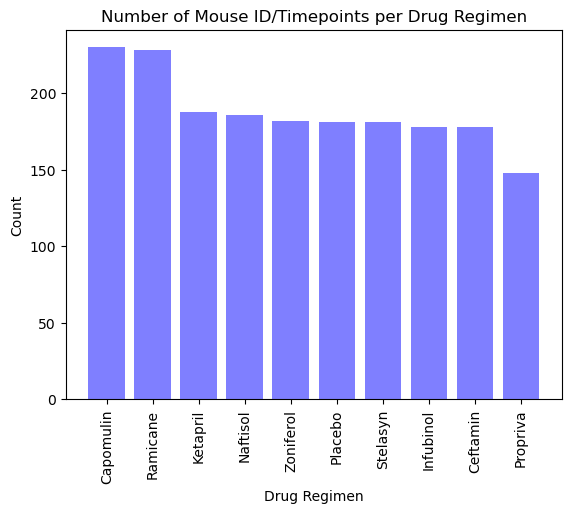

In [29]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_counts = clean_data['Drug Regimen'].value_counts()
regimens = drug_counts.index
counts = drug_counts.values
plt.bar(regimens, counts, color='blue', alpha=0.5)

# Labels

plt.title('Number of Mouse ID/Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Count')

plt.xticks(rotation='vertical')

# Print

plt.show()

<AxesSubplot:ylabel='Sex'>

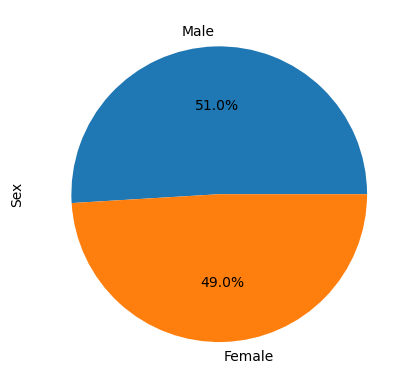

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_gender_data = clean_data['Sex'].value_counts()
mice_gender_data.plot.pie(autopct = "%1.1f%%")

<function matplotlib.pyplot.show(close=None, block=None)>

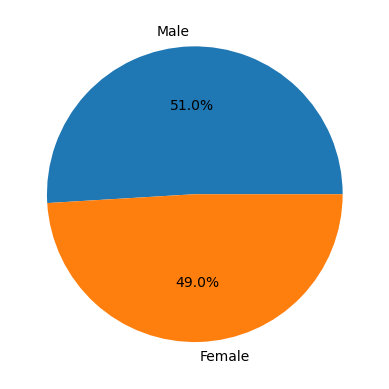

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels=mice_gender_data.index.tolist()
sizes=mice_gender_data.values.tolist()
plt.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.show

## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
ramicane_df = clean_data.loc[clean_data["Drug Regimen"] == "Ramicane", :]
infubinol_df = clean_data.loc[clean_data["Drug Regimen"] == "Infubinol", :]
ceftamin_df = clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse

capomulin_time = capomulin_df.groupby('Mouse ID').max()['Timepoint']
ramicane_time = ramicane_df.groupby('Mouse ID').max()['Timepoint']
infubinol_time = infubinol_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_time = ceftamin_df.groupby('Mouse ID').max()['Timepoint']


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

capomulin_vol=pd.DataFrame(capomulin_time)
ramicane_vol=pd.DataFrame(ramicane_time)
infubinol_vol=pd.DataFrame(infubinol_time)
ceftamin_vol = pd.DataFrame(ceftamin_time)

capomulin_merge = pd.merge(capomulin_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
ramicane_merge = pd.merge(ramicane_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
infubinol_merge = pd.merge(infubinol_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
ceftamin_merge = pd.merge(ceftamin_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")

print(capomulin_merge.head())
print(ramicane_merge.head())
print(infubinol_merge.head())
print(ceftamin_merge.head())

  Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     b128         45    Capomulin  Female           9          22   
1     b742         45    Capomulin    Male           7          21   
2     f966         20    Capomulin    Male          16          17   
3     g288         45    Capomulin    Male           3          19   
4     g316         45    Capomulin  Female          22          22   

   Tumor Volume (mm3)  Metastatic Sites  
0           38.982878                 2  
1           38.939633                 0  
2           30.485985                 0  
3           37.074024                 1  
4           40.159220                 2  
  Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     a411         45     Ramicane    Male           3          22   
1     a444         45     Ramicane  Female          10          25   
2     a520         45     Ramicane    Male          13          21   
3     a644         45     Ramicane  Female     

In [91]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_data = []

# Create empty list to fill with tumor vol data (for plotting)

merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

for treatment in treatments:
# Locate the rows which contain mice on each drug and get the tumor volumes
   
    treatment_merge = merged_data.loc[merged_data["Drug Regimen"] == treatment]
    tumors = treatment_merge["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers
   
    quartiles = tumors.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

# Determine outliers using upper and lower bounds
    
    outliers = tumors.loc[(tumors < lower_bound) | (tumors > upper_bound)]

    print(f"For {treatment}, Values below {lower_bound} could be outliers.")
    print(f"For {treatment}, Values above {upper_bound} could be outliers.")
    print("------------------------------------------------------------------------")

    tumor_data.append(tumors)

For Capomulin, Values below 26.714832162499995 could be outliers.
For Capomulin, Values above 55.9711007025 could be outliers.
------------------------------------------------------------------------
For Ramicane, Values below 24.1865864625 could be outliers.
For Ramicane, Values above 57.488048122500004 could be outliers.
------------------------------------------------------------------------
For Infubinol, Values below 32.309217298749985 could be outliers.
For Infubinol, Values above 72.31757996875001 could be outliers.
------------------------------------------------------------------------
For Ceftamin, Values below 32.81891142624998 could be outliers.
For Ceftamin, Values above 71.19095325625001 could be outliers.
------------------------------------------------------------------------


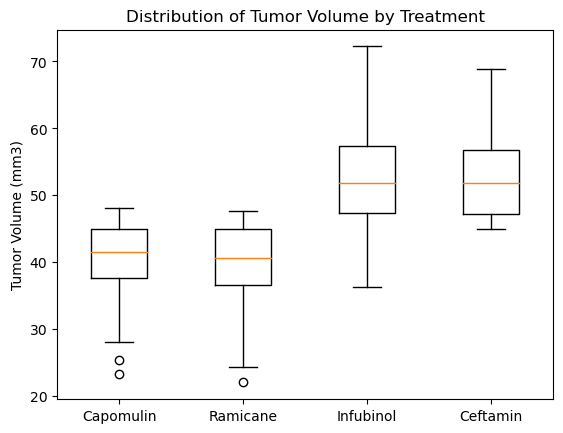

In [92]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig, ax = plt.subplots()
ax.boxplot(tumor_data)

# Set the x-axis labels to the treatments

ax.set_xticklabels(treatments)

# Set the y-axis label

ax.set_ylabel("Tumor Volume (mm3)")

# Set the title of the plot

ax.set_title("Distribution of Tumor Volume by Treatment")

# Show the plot

plt.show()

## Line and Scatter Plots

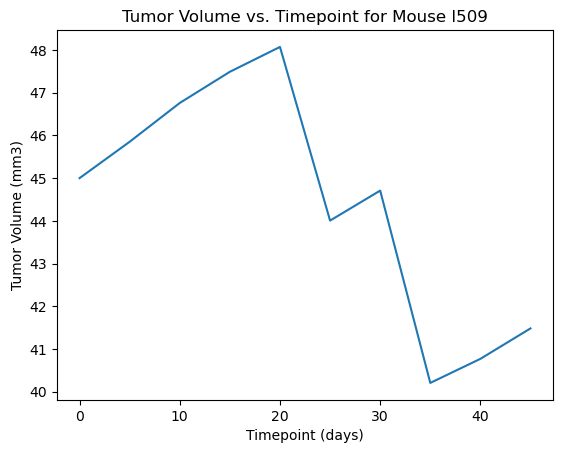

In [94]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_id = "l509"
capomulin_mouse = merged_data.loc[(merged_data["Drug Regimen"] == "Capomulin") & (merged_data["Mouse ID"] == mouse_id)]
fig, ax = plt.subplots()
ax.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"])
ax.set_xlabel("Timepoint (days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor Volume vs. Timepoint for Mouse " + mouse_id)

plt.show()

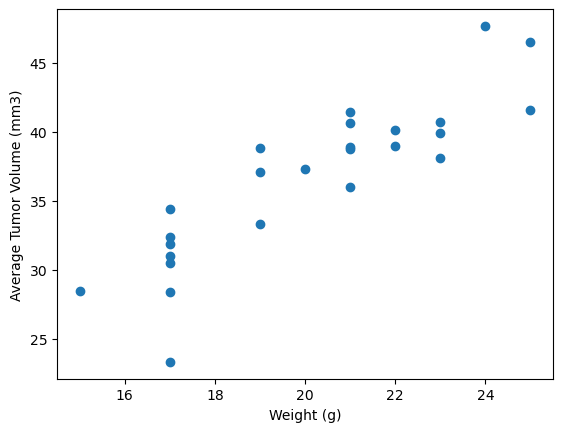

In [93]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

plt.scatter(capomulin_merge['Weight (g)'], capomulin_merge['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

Correlation coefficient: 0.8767060403658113
Slope: 1.7504682289585034
Intercept: 1.4481469525549073
R-squared value: 0.7686134812139002


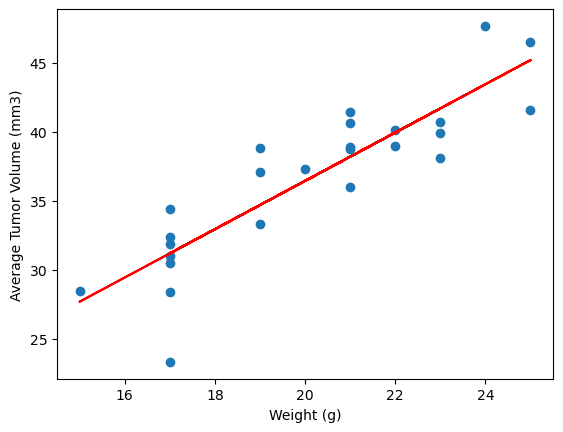

In [55]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

corr_coeff = st.pearsonr(capomulin_merge['Weight (g)'], capomulin_merge['Tumor Volume (mm3)'])[0]
print("Correlation coefficient:", corr_coeff)
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_merge['Weight (g)'], capomulin_merge['Tumor Volume (mm3)'])
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared value:", r_value**2)
plt.scatter(capomulin_merge['Weight (g)'], capomulin_merge['Tumor Volume (mm3)'])
plt.plot(capomulin_merge['Weight (g)'], intercept + slope*capomulin_merge['Weight (g)'], 'r')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()